# **Series de tiempo**
Variable numerica que depende de su comportamiento casi exclusivamente de tiempo. Los modelos se tratan de definic como si y(t) dependiera de los patrones de tiempo pasados para predecir el futuro 
 - ![Imagen de WhatsApp 2025-10-01 a las 08.14.29_7cb01055.jpg](<attachment:Imagen de WhatsApp 2025-10-01 a las 08.14.29_7cb01055.jpg>)
Queremos que identífique
- Tendencias: aritmeticas , geometricas 
- Patrones ciclicos en la funcion 
- Patrones ciclicos en la amplitud
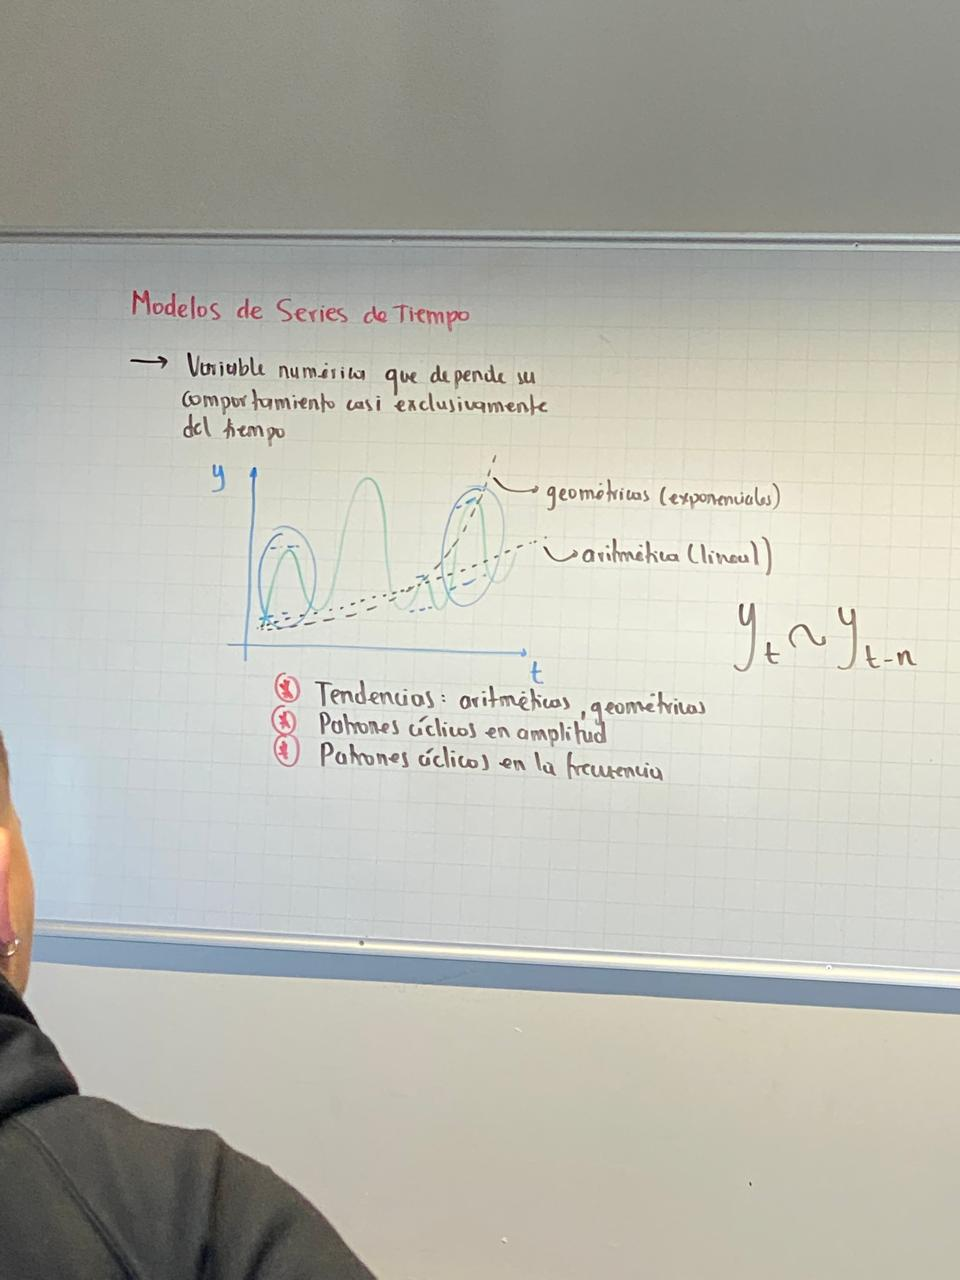

## **Modelo económetricos** 
hasra ahora ninguno es ML, pero se reformularán

De la familia **SARIMAX** (son 5 elemnte¿os que llevan a que podamos construir un modelo dde predicción ) en modelo de suavisación exponencial dice que todo es dependiente del que en el ultimo periodo lo que paso ayer me predice lo qu epasara mañana. 
- S: estacional -- Me interesa conocer los patrones de frecuencia y de la amplitud que se vean repetitivos 
- AR: autoregresivo -- Mis valores futuros dependen de la ventana de tiempo del pasado, y que ese proceso autoregresivo es lineal. 
- I: Integral --estacionaria con 4 condiciones --Los métodos de estádistica avanzada funcionan si y solo si la serie es estacionar , por k¿lo que si no lo es tengo que integrar haciendo una diferenciacion a la serie
    - media constante en todo el tiempo (osea que no tiene tendencias)
    - var constante en todo el tiempo (amplitud siempre en los mismos valores )
    - covarianza constante en todo el tiempo (exixten patrones repetitivos en la frecuencia )
- MA: Media movil -- Se toma una ventana de t , promedio todos sus valores, y encuentro los valores residuales que permita estimar ell comportamiento de la serie 
- X: exogena -- Con precio de barrir del petroleo, la atrm cambia los valores. Hay variables que no son la misma variable que impactan de orma exogela 
- Ruido blanco : una serie de tiempo con media 0, un comportamiento esperado de todas las series.  
    Se puede elegir los que sean y combinarlos, ARMAX, IMAX... SARIMAX (p,d,q)(P,D,Q) 
     - p- cantidad de retrasos de la parte autoregresia, ventana donde cuantos valores me generan el valor futuro de la serie
     - d- cantidad de veces que se trasformo la serie para ser estacionaria 
     - q - tamaño de la ventana del proceso de media movil . Cuando se predice un valor es ventana se va moviendo
     - P- cuantos elementos repetitivos se tendran en cuenta para ese patron estacional de la serie
     - Q - lo mismo pero en el componente estacional repetitivo
     - D - si se tuvo qye hacer algo para que en el estacionario para que 
     - M- frecuencia escenario estacional.
    Ejem :SARIMAX (1,0,0)(1,0,0) para encontrar los p, d, q 

    - 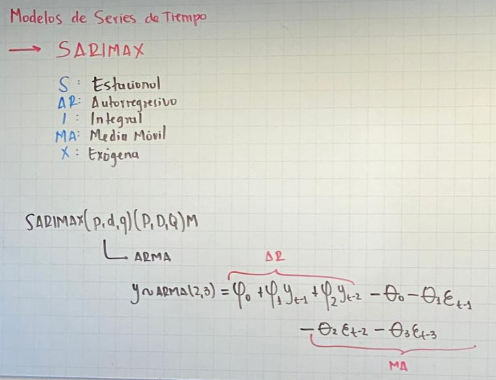
    1. Para encontrar d: transformaciones a la estacionaleidad. Se debe saber si una serie es o o estacionaria.

     - 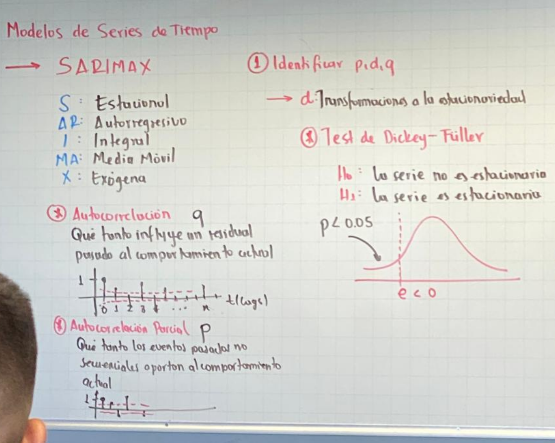
            - Si es geometrica, sacar un logaritmo 
        - Utilizamos el test de dickey fuller, que determina si una serie de tiempo es o no estacionaria con pruebas de hipotesis. 
        - Ho(la serie no es estacionaria)- Ha( la serie es estacionaria). Una serie de normalidad de una cola, si el estadistico es neg, y se rechaza la Ho si p<0.05. Osea que la serie es estacionaria. 
        - Si la serie no es estacioanria, se puede ..
            - Restar la serie con un valor pasado , quitando elementos aritmeticos. 
                - Autocorrelacion: qué tanto influye un residual pasado al comportamiento actual - para q - Se hace un grafico que va de 0 a t. q es la cantidad de resagos secuenciados mientras que no entren a las bandas de secuenciacion. Las bandas se calculan automaticamente.
                - Correlacion parcial: qué tanto lo eventos pasados no secuenciales aportan al comportamiento actual.
    2. Criterios de maxima verosimilitud : 
        - minimo de acaiki (AIC): Es una euristica muy grande entonces lo sacan de los modelos de ML, como hay optimización lo vemos. 

    
- Para estimar estos modelos hay 2 caminos 
    - Fuerza bruta: Probar y probar hasta que me de 
    - Box and :


# **1.Entendimiento del problema**
El gobierno australiano quiere conocer cuanto puede ser el costo del uso de corticoides y esteroides en el sistema de salud actual para prepara sus finanzas a futuro 

# **2. Enfoque análitico**
Contruir un modelo de regresión basado en series de tiempo que permita estimar el costo de los corticoides y esteroides con el menor MAE posible 

# **3. Requerimiento de datos**
Se requieren datos pasados del costo de medicamentos 

# **4. Recolección de datos**

In [1]:
import matplotlib.pyplot as plt
from skforecast.datasets import fetch_dataset

In [2]:
data=fetch_dataset(name='h2o_exog')
data.index.name = 'datatime'

h2o_exog
--------
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008. Two additional variables (exog_1, exog_2) are
simulated.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice (3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,
https://github.com/robjhyndman/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (195, 3)


In [3]:
data

y    exog_1    exog_2
datatime                                
1992-04-01  0.379808  0.958792  1.166029
1992-05-01  0.361801  0.951993  1.117859
1992-06-01  0.410534  0.952955  1.067942
1992-07-01  0.483389  0.958078  1.097376
1992-08-01  0.475463  0.956370  1.122199
...              ...       ...       ...
2008-02-01  0.761822  1.515840  1.786373
2008-03-01  0.649435  1.506258  1.694264
2008-04-01  0.827887  1.505253  1.627135
2008-05-01  0.816255  1.491464  1.555068
2008-06-01  0.762137  1.459856  1.463507

[195 rows x 3 columns]

# **5. Exploración de datos**
- Identíficar los patrones de las serie 
- Determinar la estacionariedad de la serie 



In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from skforecast.plot import set_dark_theme

set_dark_theme()

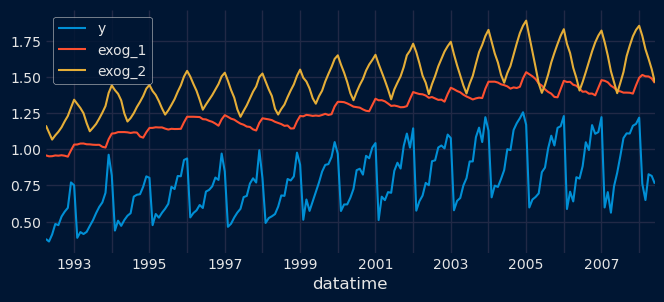

In [5]:
fig, ax = plt.subplots(figsize=(7, 3))
data.plot(ax=ax)
ax.legend()
plt.show()

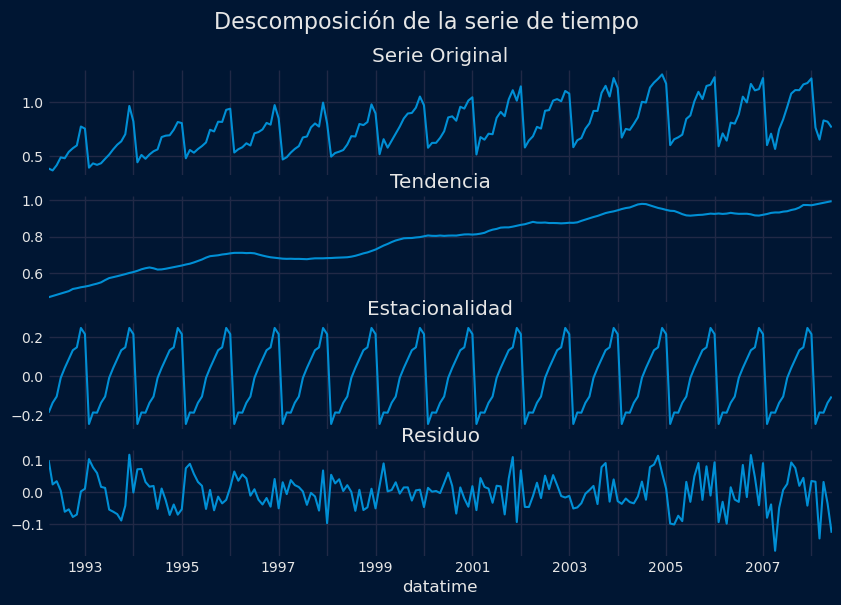

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

res_decompose = seasonal_decompose(data['y'], model='additive', extrapolate_trend='freq')
fig, ax = plt.subplots(4, 1, figsize=(9, 6), sharex=True)

res_decompose.observed.plot(ax=ax[0])
ax[0].set_title('Serie Original')

res_decompose.trend.plot(ax=ax[1])
ax[1].set_title('Tendencia')

res_decompose.seasonal.plot(ax=ax[2])
ax[2].set_title('Estacionalidad')

res_decompose.resid.plot(ax=ax[3])
ax[3].set_title('Residuo')

fig.suptitle('Descomposición de la serie de tiempo', fontsize=16)
plt.show()
# hay una tendencia 

In [7]:
def test_estacionaridad(series):
    adfuller_result = adfuller(series)
    print(f'ADF Estadistico: {adfuller_result[0]}')
    print(f'Valor p: {adfuller_result[1]}')
test_estacionaridad(data['y'])

ADF Estadistico: -1.51804580609337
Valor p: 0.5245662008648543


# **6. Preparación de los datos**

preparar lo sdatos teniendo en cuenta que esa preparación va a involucrar una parte de modelamiento 
- Diferenciar la serie 
- identificar su comportamiento estacional 


ADF Estadistico: -3.272501193023124
Valor p: 0.016153320135665988


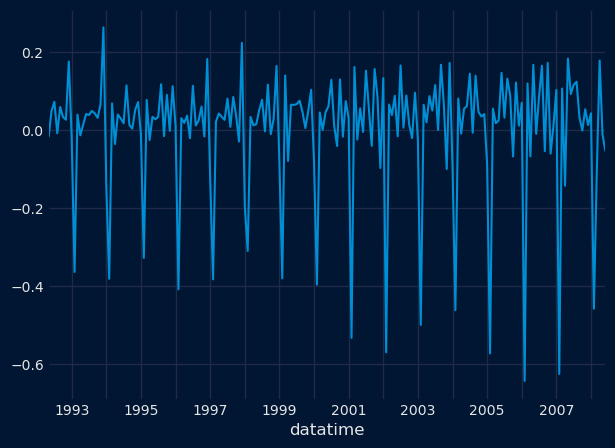

In [8]:
data_diff = data['y'].diff().dropna()
test_estacionaridad(data_diff)
data_diff.plot()
plt.show()
#Aquí la graficamos de una vez, una serie diferenciada que cumple con las dos condiciones de estacionariedad
#mientras mas negativo el pval tira más a la banda izq
#efecto nocivo en diferenciar mucho una serie y es que voy perdiendo diferenciacion
#si se puede hacer en un modelo sarimax
#lo que se hace en dif es que toma el valor de t1 y lo resta en t0 


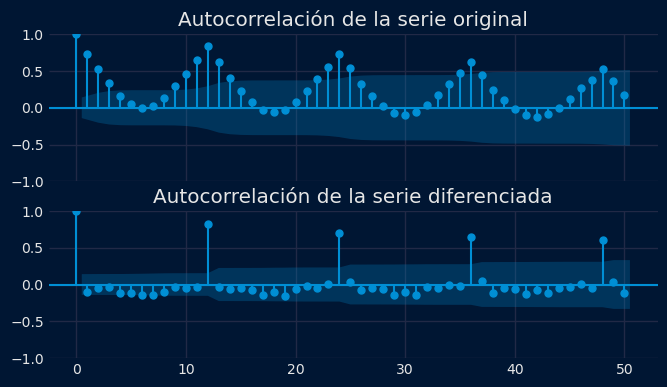

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

# Grafico de autocorrelacion
fig, ax = plt.subplots(2, 1, figsize=(7, 4), sharex=True)

plot_acf(data['y'], ax=ax[0], lags=50, alpha=0.05)
ax[0].set_title('Autocorrelación de la serie original')

plot_acf(data_diff, ax=ax[1], lags=50, alpha=0.05)
ax[1].set_title('Autocorrelación de la serie diferenciada')

plt.show()
#la diferenciacion aritmetica lo uqe hace es quitar el factor incremental constante en el tiempo de la tendencia 
#cuando se mira la autocorr empezamos a mirar 2 elementos, que tanto es la corr del valor hoy con respecto al valor arnterior, generando una barras de aprovacion o de rechazo. Ibamos a contar la cantidad de resagos de la media movil
#sobre la serie dif se diseña
#cuantos resagos etan por fuera d el abanda de rechazo? 0, el primero no se cuenta. 
#la serie tiene un componente estacional cada 12 periodos. 
#por tanto debemos identificasr P D Q ya que son  las que me hablan del componente estacional. si en nuestros trabajos llegamos a tener esos valore entonces debemos hacer esto 
#se debe eliminar esa tendencia a la componente estacional 

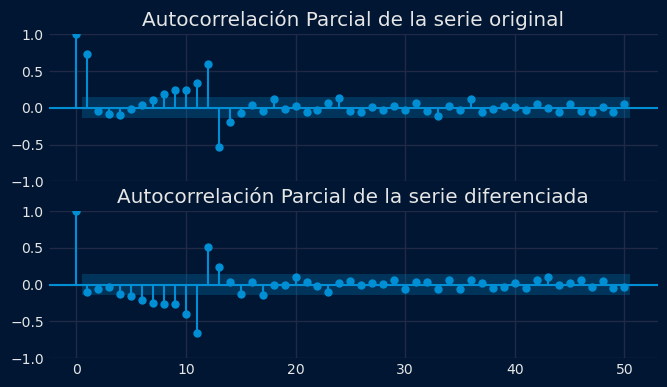

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

# Grafico de autocorrelacion
fig, ax = plt.subplots(2, 1, figsize=(7, 4), sharex=True)

plot_pacf(data['y'], ax=ax[0], lags=50, alpha=0.05)
ax[0].set_title('Autocorrelación Parcial de la serie original')

plot_pacf(data_diff, ax=ax[1], lags=50, alpha=0.05)
ax[1].set_title('Autocorrelación Parcial de la serie diferenciada')

plt.show()
# para p nos vamos con la auto corr
#cuantos resagos etan por fuera d el abanda de rechazo? sigue siendo 0 . el eje x son resagos o valores en el tiempo y y es la corr que va entre -1 y 1.


### Diferenciación de la serie estacional 

In [11]:
#primer diff resta uno a uno, periodo a periodo, segundo diff resta cada 12 periodos para quitar componente estacional
data_diff_12= data['y'].diff().diff(12).dropna()
adfuller_result=adfuller(data_diff_12)
print(f'ADF Statistics:{adfuller_result[0]}, p-value:{adfuller_result[1]}')

ADF Statistics:-5.17760777937601, p-value:9.766313840442276e-06


<Figure size 700x300 with 0 Axes>

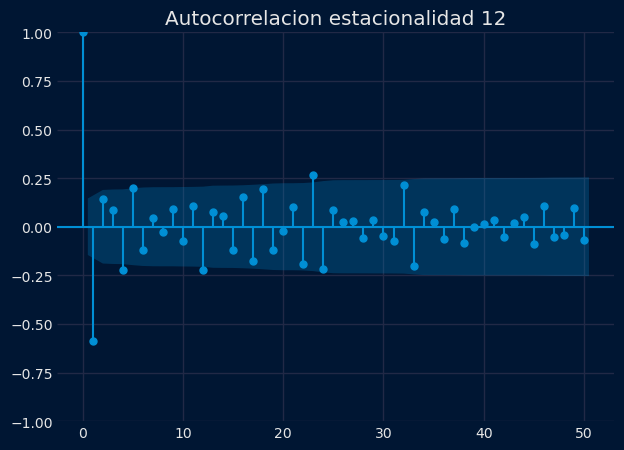

In [12]:
#aqui vamos a utilizar la que acabamos de diff
#gráfico de autocorrelacion de la serie estacionaria estacional
plt.figure(figsize=(7,3))
plot_acf(data_diff_12, lags=50,alpha=0.05)
plt.title('Autocorrelacion estacionalidad 12')
plt.show()
#cuánto es Q? es 1, pues solo un resago sale de las bandas
#Cuanto es P? 2

### Nuestro sarimax es:
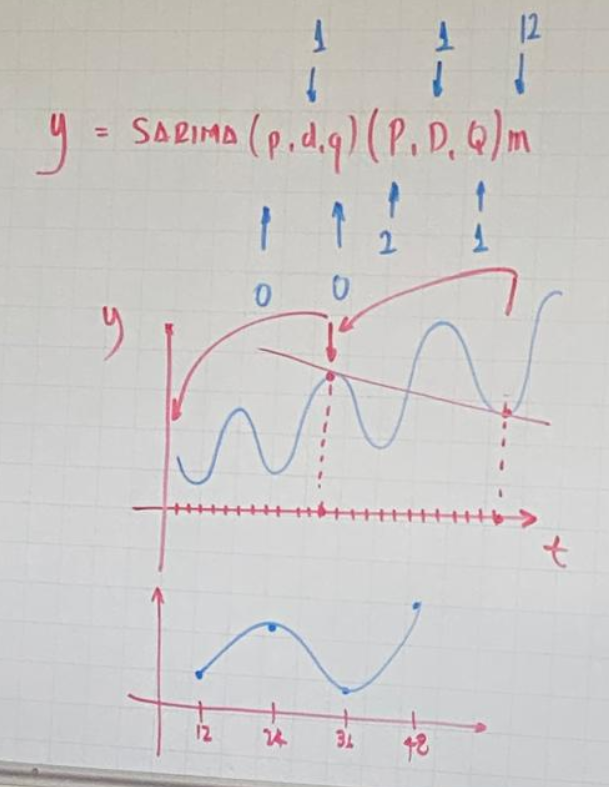


### Imputacion de nulos en series de tiempo 


In [13]:
# solo para mostrar, pues la serie que estamos trabajando no tiene datos nulos , entonces vamos a traer otra base de datos de r
import statsmodels.api as sm
import pandas as pd
df_serie = sm.datasets.get_rdataset('airquality').data
df_serie['year'] = 1973
df_serie['date'] = pd.to_datetime(df_serie[['year', 'Month', 'Day']])
df_serie.index = df_serie['date']
df_serie

Ozone  Solar.R  Wind  Temp  Month  Day  year       date
date                                                               
1973-05-01   41.0    190.0   7.4    67      5    1  1973 1973-05-01
1973-05-02   36.0    118.0   8.0    72      5    2  1973 1973-05-02
1973-05-03   12.0    149.0  12.6    74      5    3  1973 1973-05-03
1973-05-04   18.0    313.0  11.5    62      5    4  1973 1973-05-04
1973-05-05    NaN      NaN  14.3    56      5    5  1973 1973-05-05
...           ...      ...   ...   ...    ...  ...   ...        ...
1973-09-26   30.0    193.0   6.9    70      9   26  1973 1973-09-26
1973-09-27    NaN    145.0  13.2    77      9   27  1973 1973-09-27
1973-09-28   14.0    191.0  14.3    75      9   28  1973 1973-09-28
1973-09-29   18.0    131.0   8.0    76      9   29  1973 1973-09-29
1973-09-30   20.0    223.0  11.5    68      9   30  1973 1973-09-30

[153 rows x 8 columns]

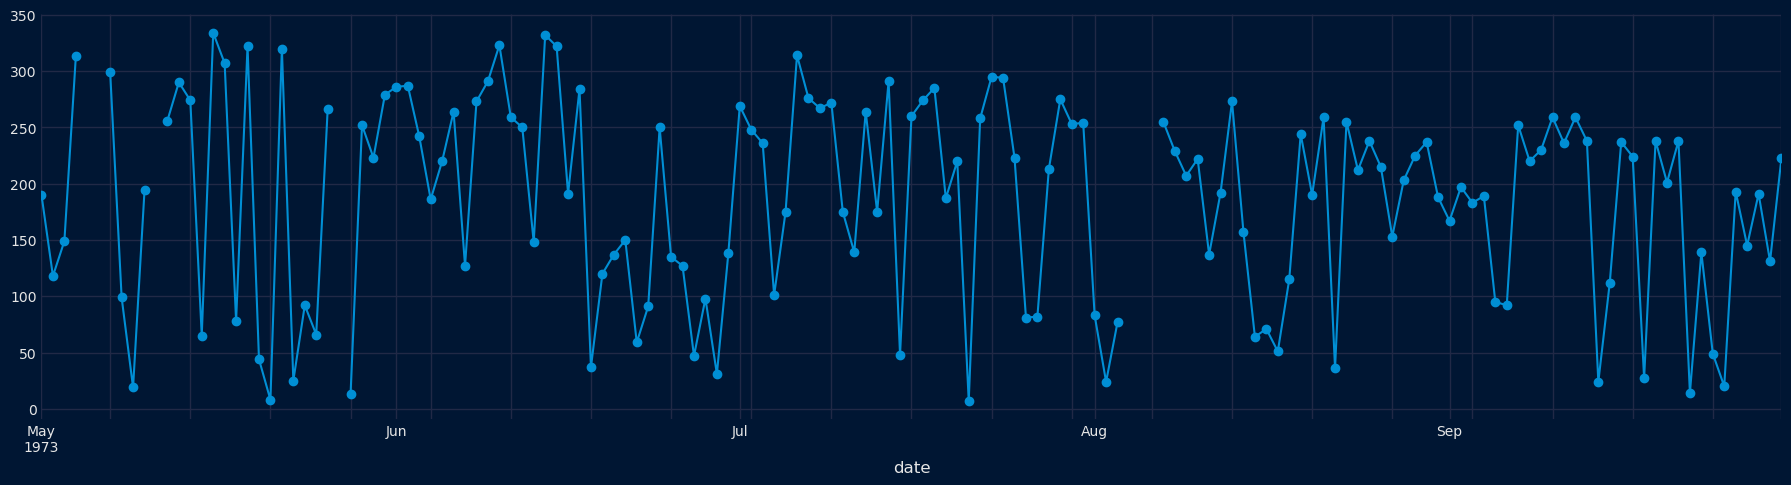

In [14]:
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
plt.show()

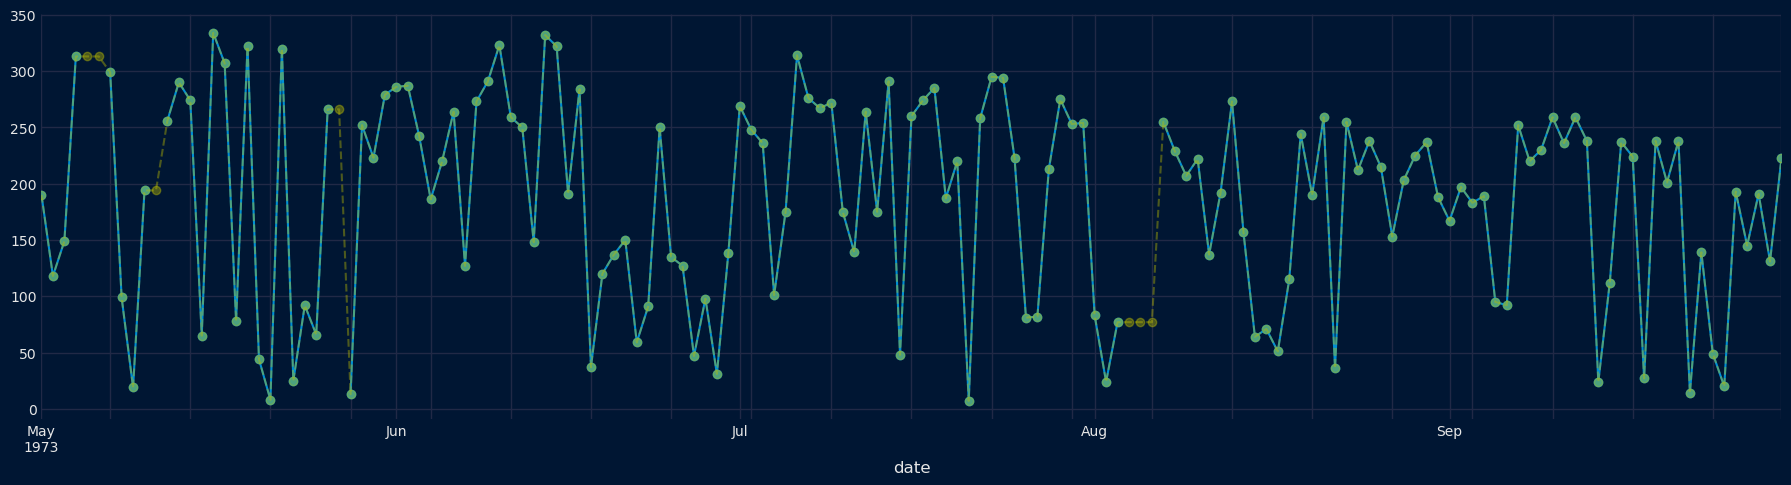

In [15]:
#imputacion por llenado hacie adelante (series ecnomicas)
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
df_serie['Solar.R'].ffill().plot(color='y',alpha=0.4,ls='dashed', marker= 'o')
plt.show()

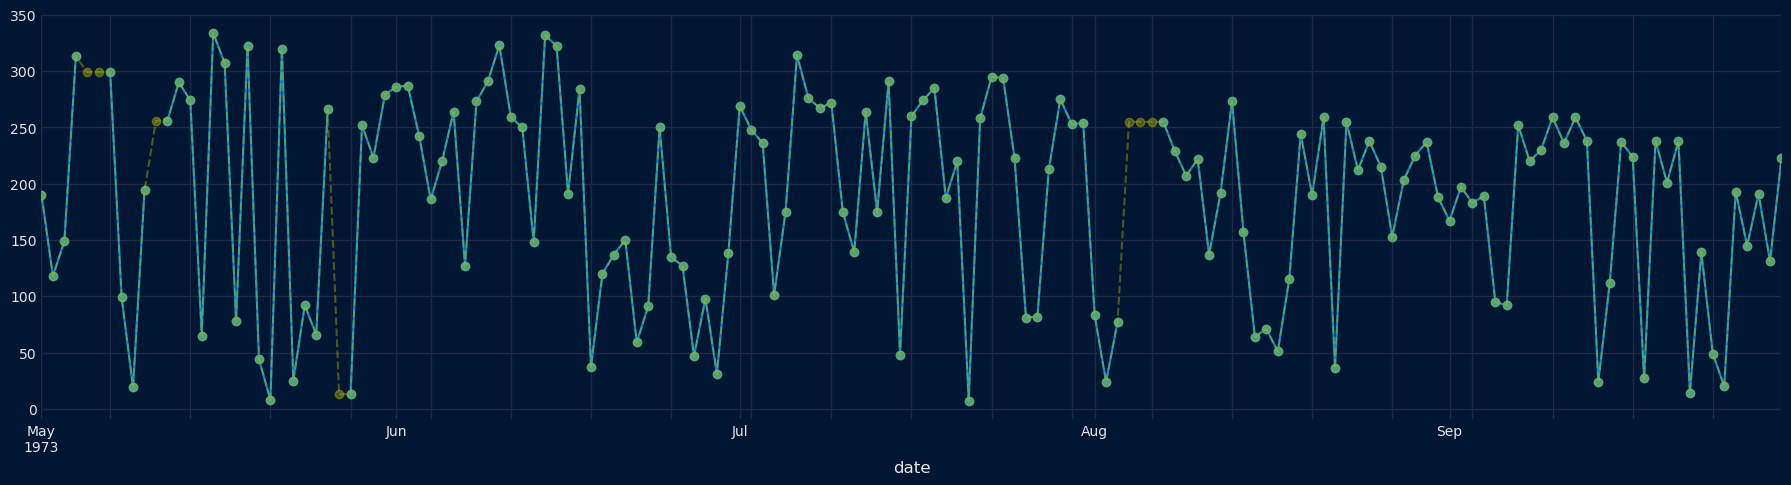

In [16]:
#imputacion por llenado hacie atrás 
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
df_serie['Solar.R'].bfill().plot(color='y',alpha=0.4,ls='dashed', marker= 'o') #aquí cambia 
plt.show()

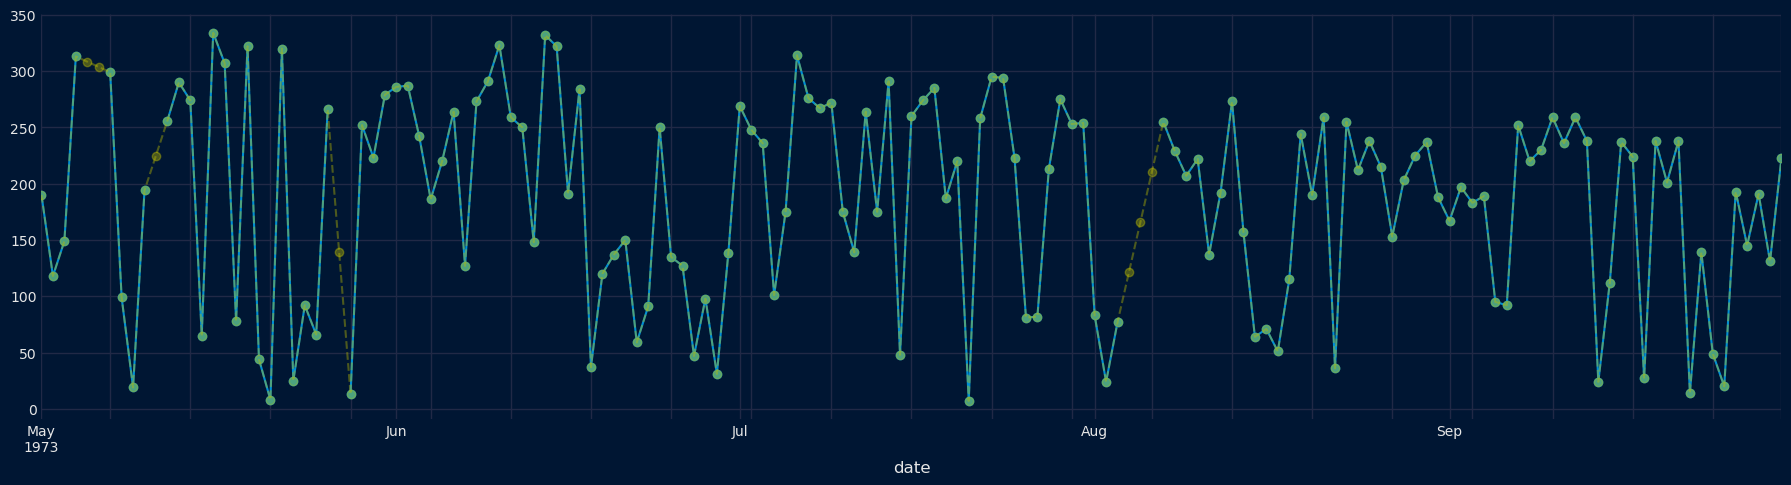

In [17]:
#imputacion por interpolacion de cercania (no muy buena)
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
df_serie['Solar.R'].interpolate(method= 'linear').plot(color='y',alpha=0.4,ls='dashed', marker= 'o') #aquí cambia 
plt.show()

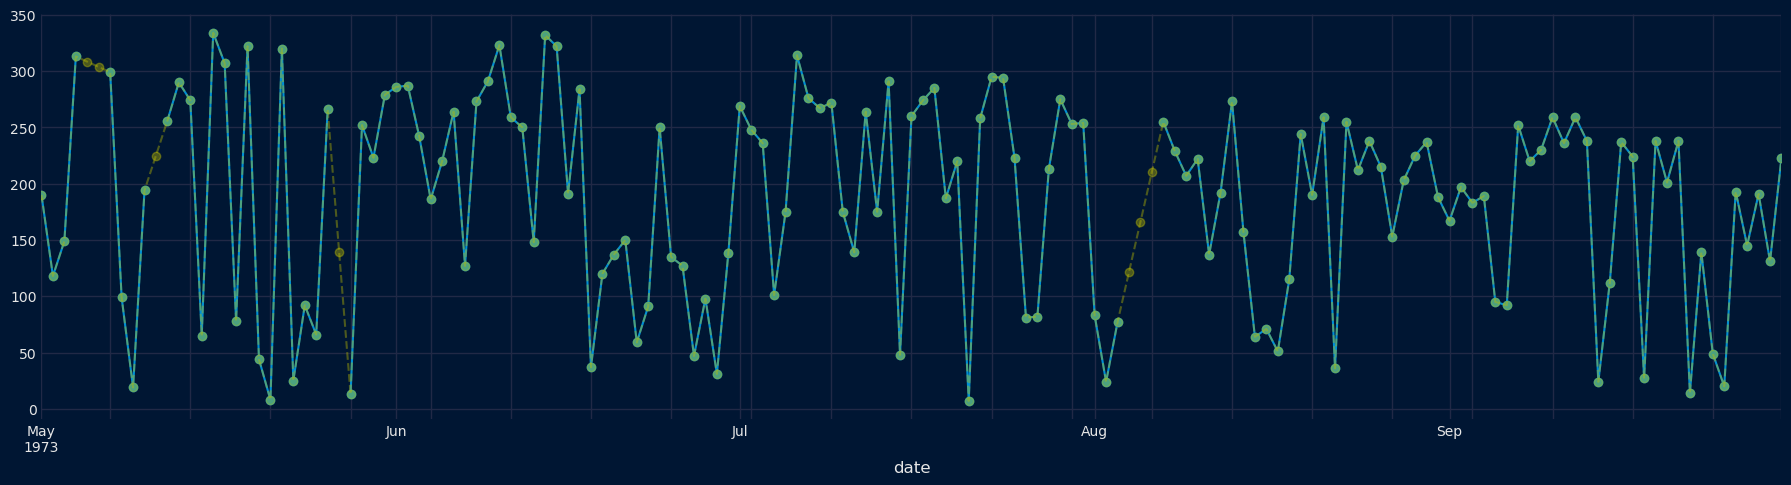

In [18]:
#imputacion por interpolacion lineal (no muy buena)
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
df_serie['Solar.R'].interpolate(method='linear').plot(color='y',alpha=0.4,ls='dashed', marker= 'o') #aquí cambia 
plt.show()

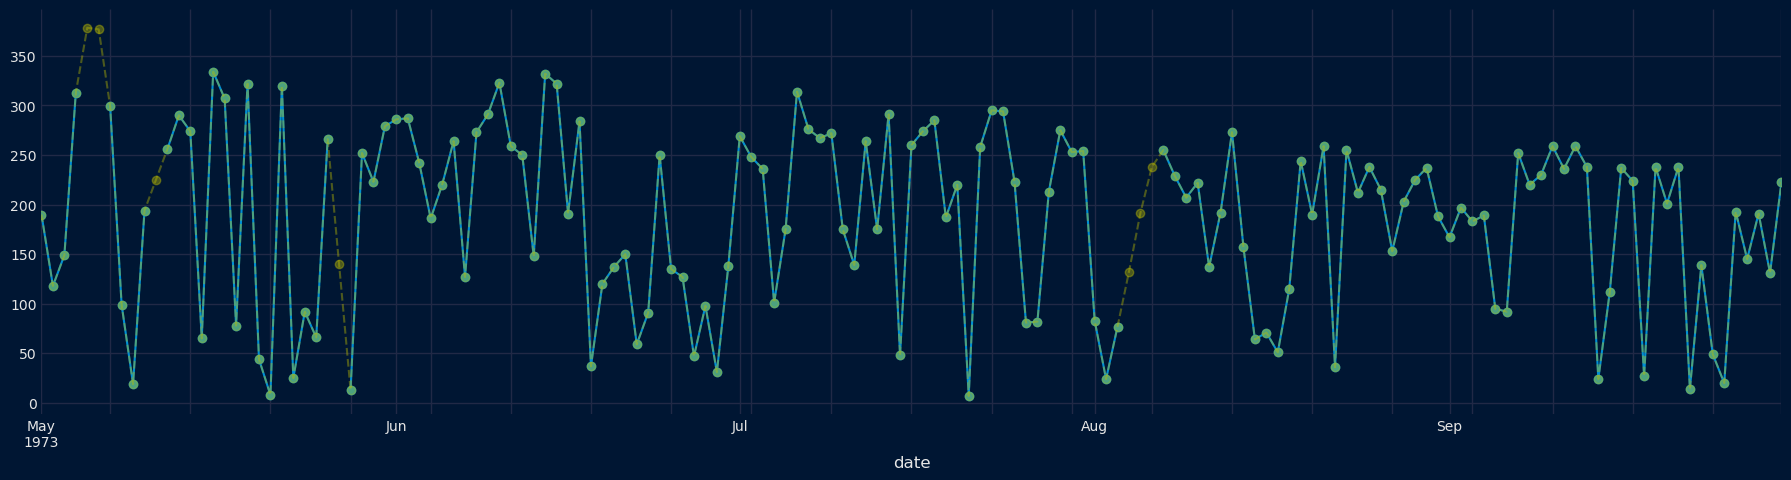

In [19]:
#imputacion por interpolacion de orden superior suavisada, ed de orden cubico , mejor 
plt.figure(figsize=(20,5))
df_serie['Solar.R'].plot(marker='o')
df_serie['Solar.R'].interpolate(method='akima').plot(color='y',alpha=0.4,ls='dashed', marker= 'o') #aquí cambia 
plt.show()

### separar entre entrenamiento y prueba 
- este no puede ser aleatorio , ya que el valor futuro depende de los valores pasados. 
- los valores más antiguos van a ser el 70% (train) y el 30% más nuevos (test).
- En la pandemia todo fue muy raro , se elimina la pandemia y se puede tratar como nulos e imoutar 

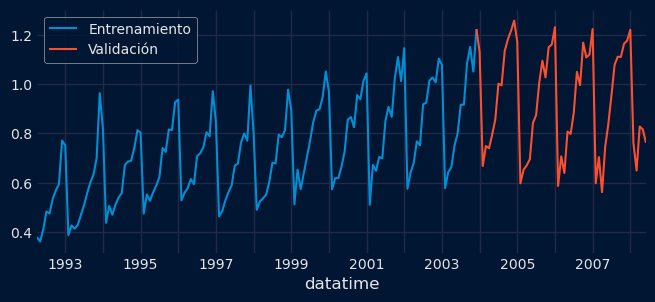

In [20]:
#entrenamiento y prueba 
#tiene 195 periodos , ver cual es el 30 y 70
end_train= '2003-12-01'
data_train= data['y'].loc[:end_train]
data_test=data['y'].loc[end_train:]
plt.figure(figsize=(7,3))
data_train.plot(label='Entrenamiento')
data_test.plot(label='Validación')
plt.legend()
plt.show()


## **7. Modelado**
- Sarimax
- Forecater
- RNA secuencial


In [21]:
#Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_sarimax= SARIMAX(data_train, order=(0,1,0), seasonal_order=(2,1,1,12))
modelo_sarimax= modelo_sarimax.fit(disp=0)# dsip no muestra iter
modelo_sarimax.summary()

c:\Anacondanew3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  141
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                 178.682
Date:                              Wed, 22 Oct 2025   AIC                           -349.365
Time:                                      08:52:34   BIC                           -337.957
Sample:                                  04-01-1992   HQIC                          -344.729
                                       - 12-01-2003                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4003      0.203      1.972      0.049       0.002       0.798
ar.S.L24      -0.2295      0.132     -1.738      0.082      -0.488       0.029
ma.S.L12      -0.8184      0.260     -3.146      0.002      -1.328      -0.309
sigma2         0.0033      0.000      7.701      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                  35.76   Jarque-Bera (JB):                13.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.59   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
pred_sarimax=modelo_sarimax.get_forecast(steps=len(data_test)).predicted_mean
pred_sarimax.name='predicciones_sarimax'
display(pred_sarimax.head(4))

2004-01-01    1.153863
2004-02-01    0.719807
2004-03-01    0.792597
2004-04-01    0.791230
Freq: MS, Name: predicciones_sarimax, dtype: float64

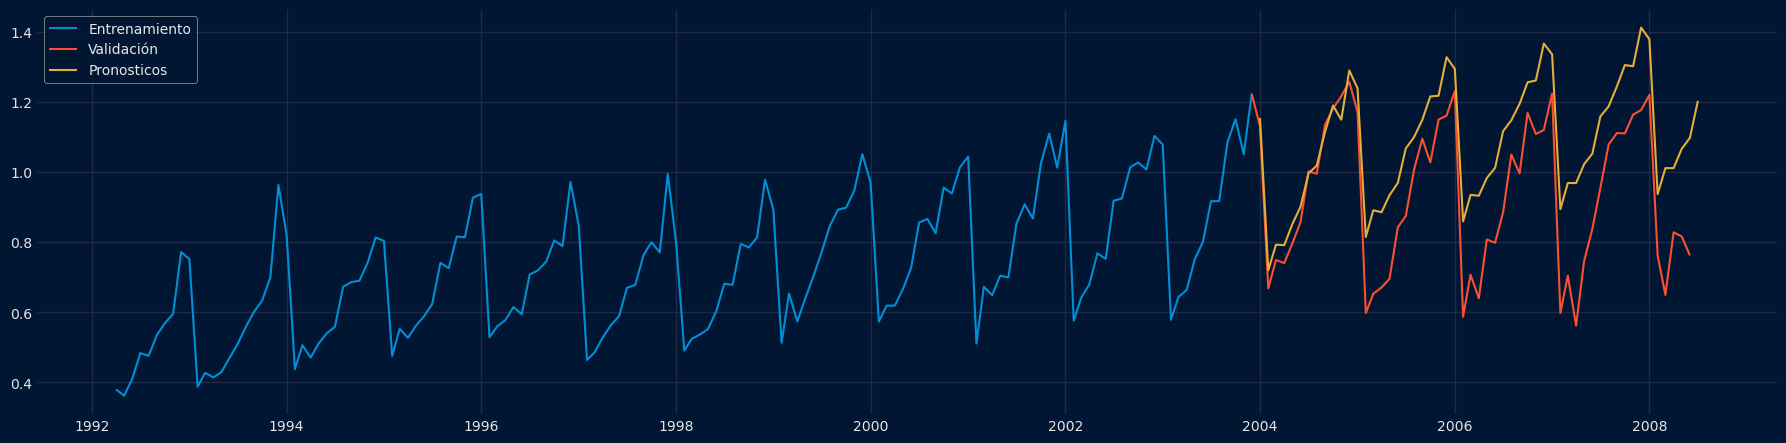

In [23]:
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')
plt.plot(pred_sarimax, label='Pronosticos')
plt.legend()
plt.show()
#el modelo predijo bien lo que se necesita 


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mape_sarimax=mean_absolute_percentage_error(data_test, pred_sarimax)
mape_sarimax
#primer modelo y el mas complicado 

0.26358709122424323

### **Series de tiempo con machine learning**
- 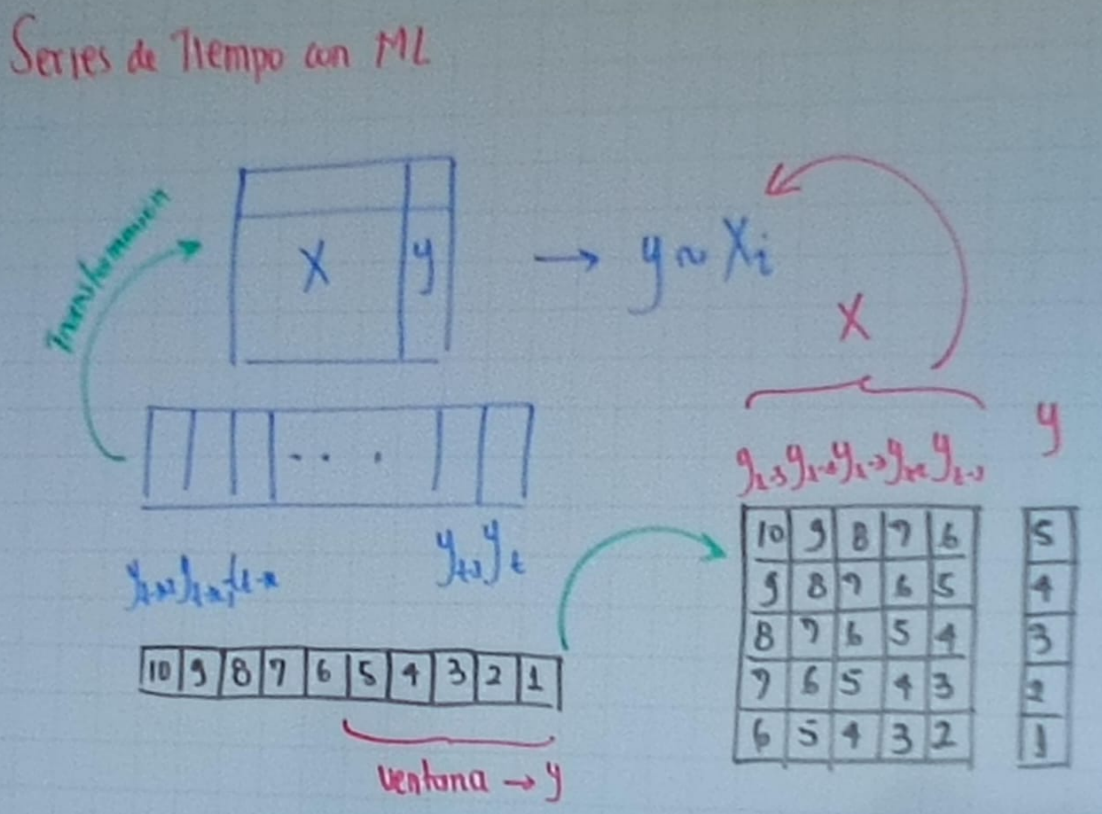
- No está la estructura propia que requiere el modelo de Ml para predecir. Entonces tenemos que hacer una transformación que nos lleve a la estructura de datos viable y posible que me permita implementarlo. Los eventos futuros dependen de los eventos pasados.
- con una ventana de resagos se hace matriz, a partir de la ventana se crea las variables x , que van a ser yt-(ventana). Con eso se puede crear un modelo supervisado donde el valor futuro depende de los valores pasados. 
- Sale un nuevo hipeerparámetro, cambiará la estructura del modelo dependiendo de la ventana.  

In [25]:
#forecaster 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from skforecast.plot import plot_prediction_intervals


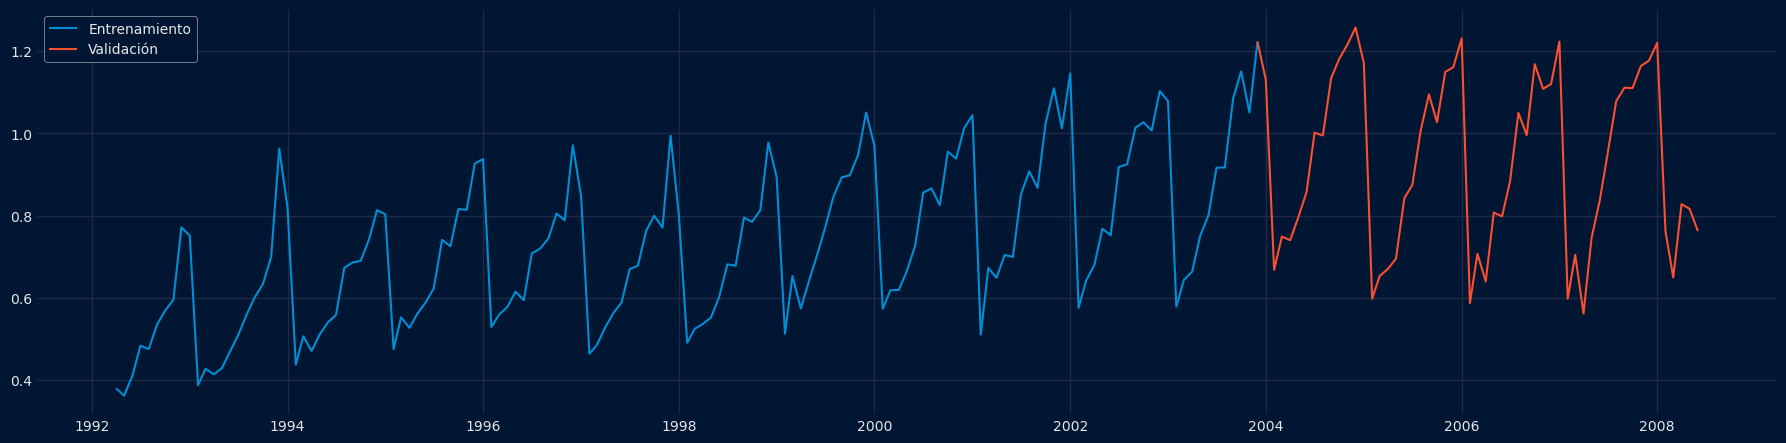

In [26]:
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')

plt.legend()
plt.show()


In [27]:
forecaster_1 = ForecasterRecursive(regressor= LinearRegression() ,
                                    lags = 15, window_features= RollingFeatures(stats=['mean'], window_sizes=10))  # utilizamos la ventana donde se crea una ventanita fija y esos lags para poder predecir los siguientes y suavisar . lo que le decimos es que coja el primero de los primeros 10 y que algo del modelo 
forecaster_1.fit(y=data_train, store_in_sample_residuals=True)
forecaster_1
#lags es 5 


=================== 
ForecasterRecursive 
=================== 
Regressor: LinearRegression 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window features: ['roll_mean_10'] 
Window size: 15 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2003-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} 
fit_kwargs: {} 
Creation date: 2025-10-22 08:52:36 
Last fit date: 2025-10-22 08:52:36 
Skforecast version: 0.16.0 
Python version: 3.13.5 
Forecaster id: None

In [28]:
#presicciones con ese forecaster
predictions_1= forecaster_1.predict(steps=len(data_test))
predictions_1

2004-01-01    1.111554
2004-02-01    0.639690
2004-03-01    0.689112
2004-04-01    0.698062
2004-05-01    0.786592
2004-06-01    0.852667
2004-07-01    0.944152
2004-08-01    0.962054
2004-09-01    1.135455
2004-10-01    1.180984
2004-11-01    1.093922
2004-12-01    1.240321
2005-01-01    1.106812
2005-02-01    0.665317
2005-03-01    0.690337
2005-04-01    0.705423
2005-05-01    0.798573
2005-06-01    0.878663
2005-07-01    0.956437
2005-08-01    0.991798
2005-09-01    1.170185
2005-10-01    1.201430
2005-11-01    1.124880
2005-12-01    1.246809
2006-01-01    1.095354
2006-02-01    0.681203
2006-03-01    0.686018
2006-04-01    0.706667
2006-05-01    0.806932
2006-06-01    0.898985
2006-07-01    0.967262
2006-08-01    1.019203
2006-09-01    1.200567
2006-10-01    1.220776
2006-11-01    1.151890
2006-12-01    1.249643
2007-01-01    1.082657
2007-02-01    0.692560
2007-03-01    0.680140
2007-04-01    0.705687
2007-05-01    0.814464
2007-06-01    0.916657
2007-07-01    0.978775
2007-08-01 

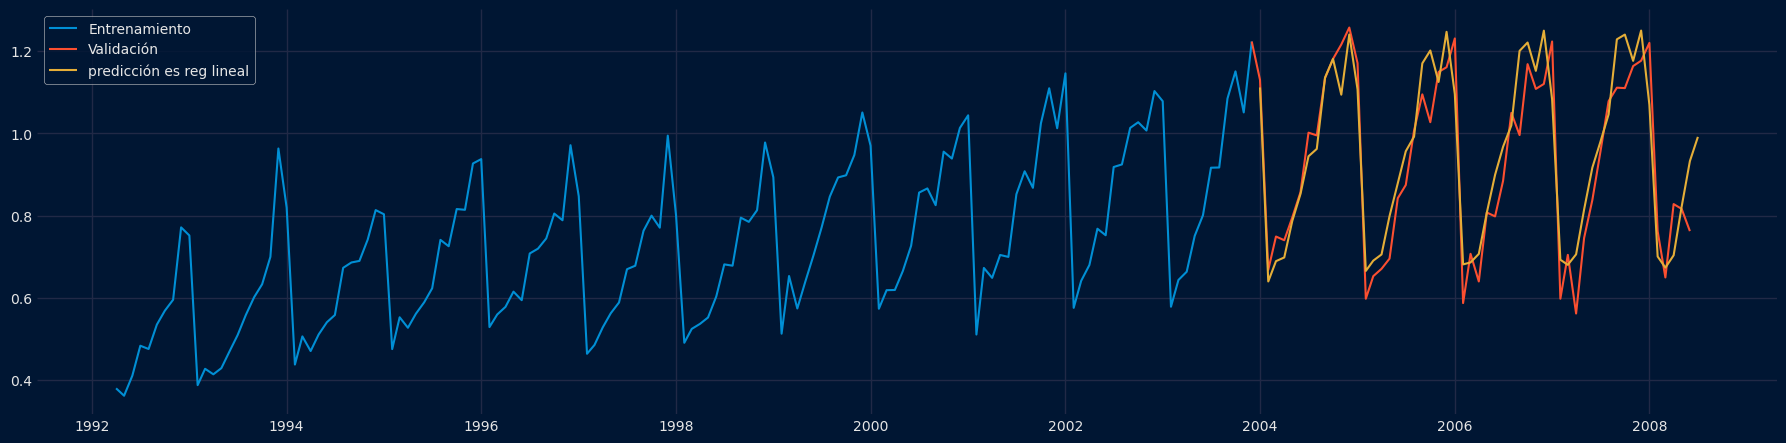

In [29]:
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')
plt.plot(predictions_1,label='predicción es reg lineal')
plt.legend()
plt.show()

In [30]:
mean_absolute_percentage_error(data_test, predictions_1)
#el mape paso del 26 al 15 porciento , se mapea un poco mejor el resultado de la serie
# de un metodo de regresión usando resagos con las ventanas 
#con metodo mas avanzado puede ser mejor, pwoe los metodos dependiendo de los hiperparametros funcionan de manera distinat 


0.14838096190284888

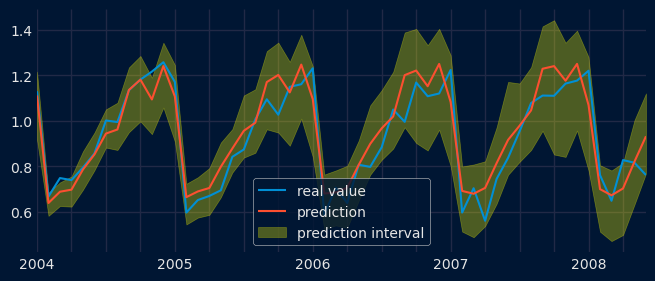

In [31]:
# al hacer estas predicciones es bueno graficar lo sintervalos de prediccion . El -1 es porque la predicion da hasta 1 m es mas 
predictions_1_interval = forecaster_1.predict_interval(steps=len(data_test)- 1,
                                                       interval=[5,95],
                                                       method='bootstrapping', n_boot=100)
plot_prediction_intervals(predictions=predictions_1_interval, y_true=data_test, target_variable='y',
                          kwargs_fill_between={'color':'yellow','alpha':0.3})

plt.show()

In [32]:
forecaster_1 = ForecasterRecursive(regressor= DecisionTreeRegressor(random_state=42) ,
                                    lags = 15, window_features= RollingFeatures(stats=['mean'], window_sizes=10))  # utilizamos la ventana donde se crea una ventanita fija y esos lags para poder predecir los siguientes y suavisar . lo que le decimos es que coja el primero de los primeros 10 y que algo del modelo 
forecaster_1.fit(y=data_train, store_in_sample_residuals=True)
forecaster_1
#lags es 5 

=================== 
ForecasterRecursive 
=================== 
Regressor: DecisionTreeRegressor 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window features: ['roll_mean_10'] 
Window size: 15 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2003-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None,
    'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf':
    0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'} 
fit_kwargs: {} 
Creation date: 2025-10-22 08:52:38 
Last fit date: 2025-10-22 08:52:38 
Skforecast version: 0.16.0 
Python version: 3.13.5 
Forecaster id: None

In [33]:
predictions_2= forecaster_1.predict(steps=len(data_test))
predictions_2

2004-01-01    1.078145
2004-02-01    0.618996
2004-03-01    0.726520
2004-04-01    0.719502
2004-05-01    0.800746
2004-06-01    0.855865
2004-07-01    0.916361
2004-08-01    0.897900
2004-09-01    1.084659
2004-10-01    1.150648
2004-11-01    1.078145
2004-12-01    1.145868
2005-01-01    1.078145
2005-02-01    0.846186
2005-03-01    0.744324
2005-04-01    0.744324
2005-05-01    0.994389
2005-06-01    0.924368
2005-07-01    1.084659
2005-08-01    1.013198
2005-09-01    1.078145
2005-10-01    1.078145
2005-11-01    1.078145
2005-12-01    1.078145
2006-01-01    1.078145
2006-02-01    1.013198
2006-03-01    1.013198
2006-04-01    1.013198
2006-05-01    1.078145
2006-06-01    1.078145
2006-07-01    1.078145
2006-08-01    1.078145
2006-09-01    1.078145
2006-10-01    1.078145
2006-11-01    1.078145
2006-12-01    1.078145
2007-01-01    1.078145
2007-02-01    1.078145
2007-03-01    1.078145
2007-04-01    1.078145
2007-05-01    1.078145
2007-06-01    1.078145
2007-07-01    1.078145
2007-08-01 

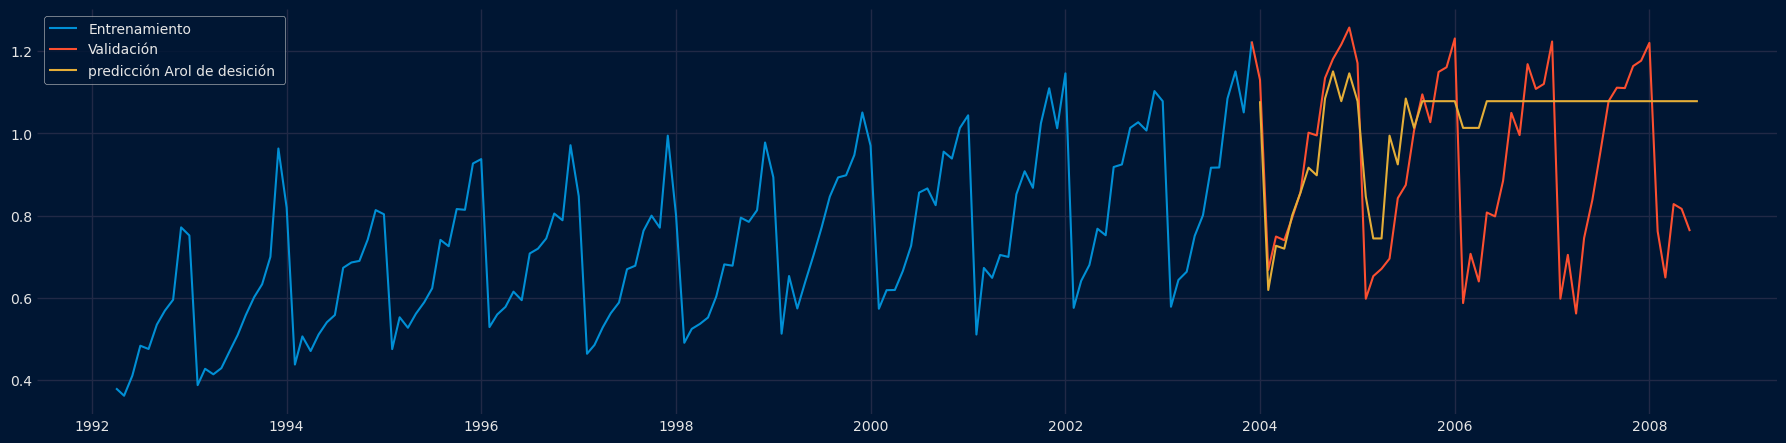

In [34]:
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')
plt.plot(predictions_2,label='predicción Arol de desición ')
plt.legend()
plt.show()

In [35]:
from skforecast.model_selection import grid_search_forecaster, random_search_forecaster, TimeSeriesFold
forecaster_2= ForecasterRecursive(regressor= DecisionTreeRegressor(random_state=42), 
                                  lags =10 )
# los lags se sobreescriven con la ventana que vamos a poner
#busqueda de ventana
lags_grid={'lags_1':3, 'lags_2':10, 'lags_3':[1,2,3,12]} #objetivo es qu ecada 12 periodos hay un evento que se repite 
#busqueda de hiperparametros del regresor 
param_grid={'max_depth':[5,10,20], 'criterion':['squared_error', 'poisson', 'absolute_error','friedman_mse']}
cv= TimeSeriesFold(steps=12, initial_train_size=len(data_test), refit=False) #la validacion cruzada lo que va tratar de hacer es tomar esa ventana e irla moviendo en el conjunto de entrenamiento 
#va a tener todos los datos y hacer predicciones en esa ventana d e12 pedazos. Predice datos a la luz del conjunto de test -- force
# el true es uqe va a acojer cada fold y lo agg ampliando la ventana fold conlos datos que entrena el modelo
#no queremos meterle ruido de las pred utilizamos el false 
#implementacion de la búsqueda
results= grid_search_forecaster(forecaster=forecaster_2,
                                y=data_train,
                                param_grid=param_grid,
                                lags_grid=lags_grid,
                                cv=cv,
                                metric='mean_squared_error',
                                return_best=True,
                                n_jobs=-1, #todos los recursos de máquina 
                                verbose=False,
                                show_progress=True)
results
#hizo la busqueda , comparo las lags, e identificó que la mejor era esa, encontrando un mse muy cercano a 0, 



lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/12 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3 12] 
  Parameters: {'criterion': 'absolute_error', 'max_depth': 5}
  Backtesting metric: 0.008137813902720652


lags lags_label  \
0                     [1, 2, 3, 12]     lags_3   
1                     [1, 2, 3, 12]     lags_3   
2                     [1, 2, 3, 12]     lags_3   
3                     [1, 2, 3, 12]     lags_3   
4                     [1, 2, 3, 12]     lags_3   
5                     [1, 2, 3, 12]     lags_3   
6                     [1, 2, 3, 12]     lags_3   
7                     [1, 2, 3, 12]     lags_3   
8                     [1, 2, 3, 12]     lags_3   
9                     [1, 2, 3, 12]     lags_3   
10                    [1, 2, 3, 12]     lags_3   
11                    [1, 2, 3, 12]     lags_3   
12                        [1, 2, 3]     lags_1   
13                        [1, 2, 3]     lags_1   
14  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
15                        [1, 2, 3]     lags_1   
16  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
17  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
18  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
19  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
20  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
21                        [1, 2, 3]     lags_1   
22                        [1, 2, 3]     lags_1   
23                        [1, 2, 3]     lags_1   
24                        [1, 2, 3]     lags_1   
25                        [1, 2, 3]     lags_1   
26                        [1, 2, 3]     lags_1   
27                        [1, 2, 3]     lags_1   
28                        [1, 2, 3]     lags_1   
29  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
30  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
31  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
32                        [1, 2, 3]     lags_1   
33  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
34  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   
35  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     lags_2   

                                              params  mean_squared_error  \
0    {'criterion': 'absolute_error', 'max_depth': 5}            0.008138   
1   {'criterion': 'absolute_error', 'max_depth': 10}            0.008439   
2   {'criterion': 'absolute_error', 'max_depth': 20}            0.008439   
3     {'criterion': 'friedman_mse', 'max_depth': 10}            0.009701   
4     {'criterion': 'friedman_mse', 'max_depth': 20}            0.009701   
5    {'criterion': 'squared_error', 'max_depth': 10}            0.009774   
6    {'criterion': 'squared_error', 'max_depth': 20}            0.009774   
7     {'criterion': 'squared_error', 'max_depth': 5}            0.009899   
8      {'criterion': 'friedman_mse', 'max_depth': 5}            0.009899   
9           {'criterion': 'poisson', 'max_depth': 5}            0.021059   
10         {'criterion': 'poisson', 'max_depth': 20}            0.022259   
11         {'criterion': 'poisson', 'max_depth': 10}            0.022259   
12  {'criterion': 'absolute_error', 'max_depth': 10}            0.040285   
13  {'criterion': 'absolute_error', 'max_depth': 20}            0.040285   
14    {'criterion': 'friedman_mse', 'max_depth': 20}            0.056392   
15   {'criterion': 'absolute_error', 'max_depth': 5}            0.059058   
16          {'criterion': 'poisson', 'max_depth': 5}            0.060295   
17  {'criterion': 'absolute_error', 'max_depth': 20}            0.062077   
18    {'criterion': 'friedman_mse', 'max_depth': 10}            0.062359   
19         {'criterion': 'poisson', 'max_depth': 10}            0.068532   
20         {'criterion': 'poisson', 'max_depth': 20}            0.068532   
21    {'criterion': 'friedman_mse', 'max_depth': 10}            0.071546   
22    {'criterion': 'friedman_mse', 'max_depth': 20}            0.071546   
23   {'criterion': 'squared_error', 'max_depth': 10}            0.071548   
24   {'criterion': 'squared_error', 'max_depth': 20}            0.071548   
25         {'criterion': 'poisson', 'max_depth': 10}            0.071548   
26         {'criterion': 'poisson', 'max_depth': 20}            0.071548   
27     {'criterion': 'friedman_mse', 'max_depth': 5}

In [36]:
forecaster_2
#queda guardado lo que acabamos de hacer y podemos mirar si la prediccion mejoro 

=================== 
ForecasterRecursive 
=================== 
Regressor: DecisionTreeRegressor 
Lags: [ 1  2  3 12] 
Window features: None 
Window size: 12 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2003-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 5,
    'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf':
    0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'} 
fit_kwargs: {} 
Creation date: 2025-10-22 08:52:38 
Last fit date: 2025-10-22 08:52:45 
Skforecast version: 0.16.0 
Python version: 3.13.5 
Forecaster id: None

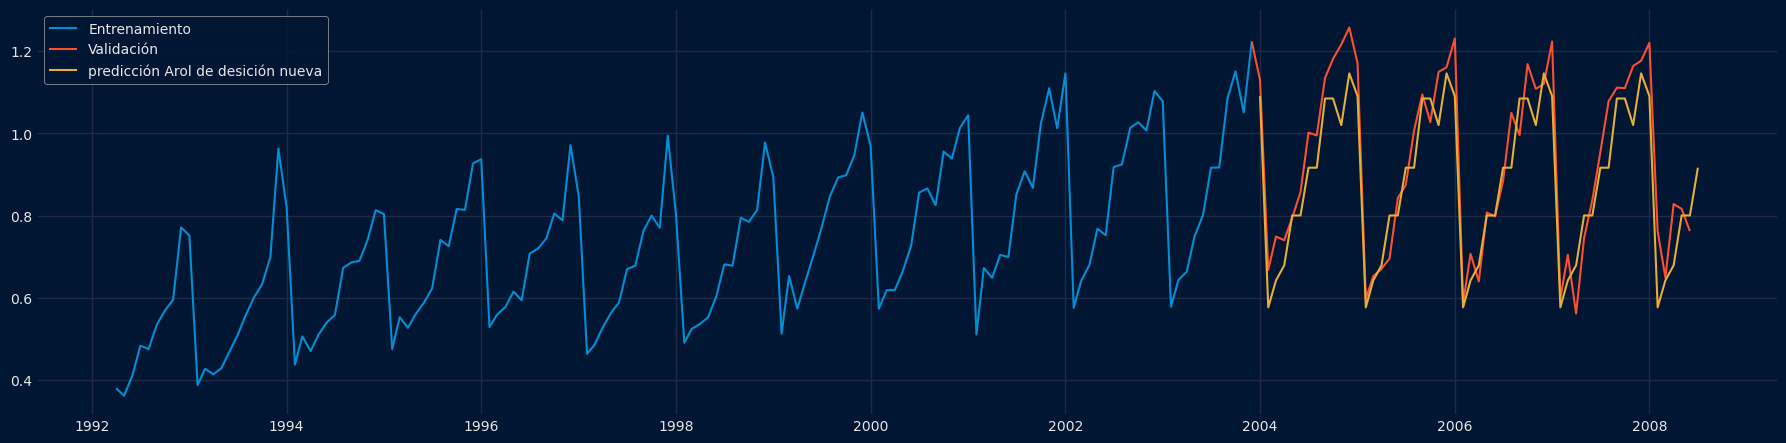

In [37]:
predictions_2= forecaster_2.predict(len(data_test))
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')
plt.plot(predictions_2,label='predicción Arol de desición nueva')
plt.legend()
plt.show()

In [38]:
mean_absolute_percentage_error(data_test, predictions_2)
#arbol crea regiones sln cuadradas
#podemos pasar a un modelo más complejo para poder tratar de validr si podemos ajustar mejor la sequivocacone 

0.11941843098736717

In [39]:

forecaster_3= ForecasterRecursive(regressor= RandomForestRegressor(random_state=42), 
                                  lags =10 )
# los lags se sobreescriven con la ventana que vamos a poner
#busqueda de ventana
lags_grid={'lags_1':3, 'lags_2':10, 'lags_3':[1,2,3,12]} #objetivo es qu ecada 12 periodos hay un evento que se repite 
#busqueda de hiperparametros del regresor 
param_grid={'max_depth':[5,10,20], 'criterion':['squared_error', 'poisson', 'absolute_error','friedman_mse'],
            'n_estimators': [100,200,300]}
cv= TimeSeriesFold(steps=12, initial_train_size=len(data_test), refit=False) #la validacion cruzada lo que va tratar de hacer es tomar esa ventana e irla moviendo en el conjunto de entrenamiento 
#folds
results= grid_search_forecaster(forecaster=forecaster_3,
                                y=data_train,
                                param_grid=param_grid,
                                lags_grid=lags_grid,
                                cv=cv,
                                metric='mean_squared_error',
                                return_best=True,
                                n_jobs=-1, #todos los recursos de máquina 
                                verbose=False,
                                show_progress=True)
results
#hizo la busqueda , comparo las lags, e identificó que la mejor era esa, encontrando un mse muy cercano a 0, 

lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/36 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3 12] 
  Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 0.011898283156282243


lags lags_label  \
0    [1, 2, 3, 12]     lags_3   
1    [1, 2, 3, 12]     lags_3   
2    [1, 2, 3, 12]     lags_3   
3    [1, 2, 3, 12]     lags_3   
4    [1, 2, 3, 12]     lags_3   
..             ...        ...   
103      [1, 2, 3]     lags_1   
104      [1, 2, 3]     lags_1   
105      [1, 2, 3]     lags_1   
106      [1, 2, 3]     lags_1   
107      [1, 2, 3]     lags_1   

                                                params  mean_squared_error  \
0    {'criterion': 'squared_error', 'max_depth': 5,...            0.011898   
1    {'criterion': 'poisson', 'max_depth': 5, 'n_es...            0.012169   
2    {'criterion': 'friedman_mse', 'max_depth': 5, ...            0.012217   
3    {'criterion': 'squared_error', 'max_depth': 20...            0.012255   
4    {'criterion': 'squared_error', 'max_depth': 10...            0.012255   
..                                                 ...                 ...   
103  {'criterion': 'friedman_mse', 'max_depth': 10,...            0.058632   
104  {'criterion': 'poisson', 'max_depth': 5, 'n_es...            0.058792   
105  {'criterion': 'friedman_mse', 'max_depth': 5, ...            0.058869   
106  {'criterion': 'poisson', 'max_depth': 10, 'n_e...            0.058931   
107  {'criterion': 'squared_error', 'max_depth': 10...            0.059357   

         criterion  max_depth  n_estimators  
0    squared_error          5           100  
1          poisson          5           100  
2     friedman_mse          5           100  
3    squared_error         20           300  
4    squared_error         10           300  
..             ...        ...           ...  
103   friedman_mse         10           300  
104        poisson          5           300  
105   friedman_mse          5           300  
106        poisson         10           300  
107  squared_error         10           300  

[108 rows x 7 columns]

In [40]:
forecaster_3

=================== 
ForecasterRecursive 
=================== 
Regressor: RandomForestRegressor 
Lags: [ 1  2  3 12] 
Window features: None 
Window size: 12 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2003-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth':
    5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None,
    'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100,
    'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0,
    'warm_start': False} 
fit_kwargs: {} 
Creation date: 2025-10-22 08:52:45 
Last fit date: 2025-10-22 08:54:12 
Skforecast version: 0.16.0 
Python version: 3.13.5 
Forecaster id: None

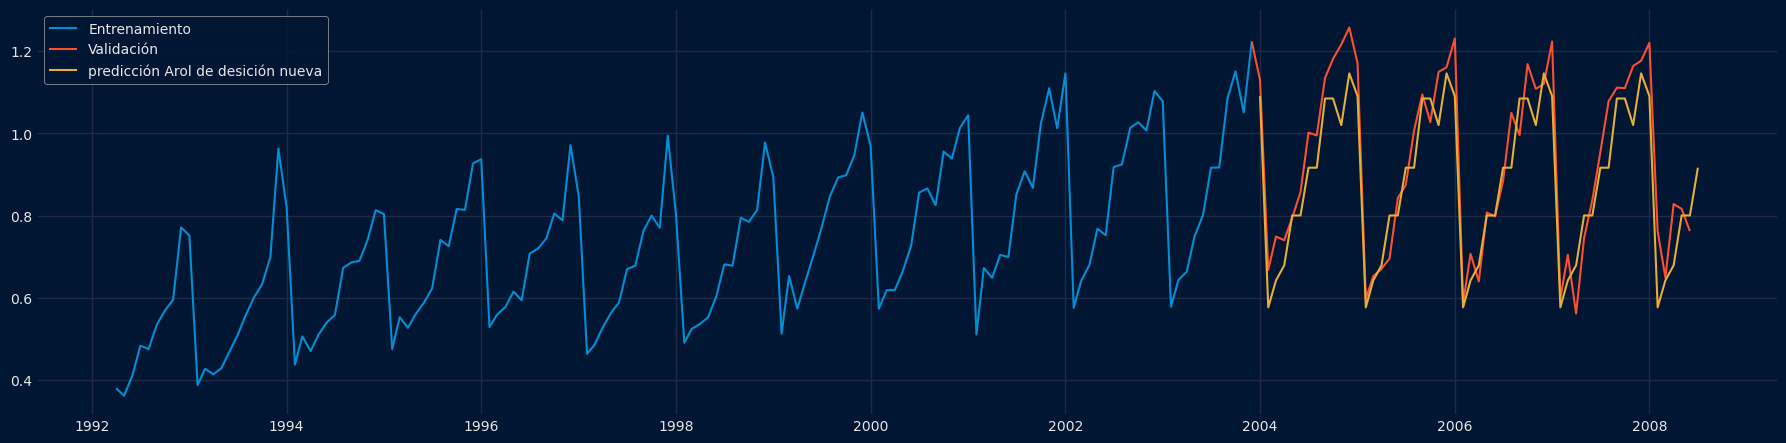

In [41]:
predictions_3= forecaster_3.predict(len(data_test))
plt.figure(figsize=(20,5))
plt.plot(data_train,label= 'Entrenamiento')
plt.plot(data_test, label='Validación')
plt.plot(predictions_2,label='predicción Arol de desición nueva')
plt.legend()
plt.show()

In [42]:
mean_absolute_percentage_error(data_test, predictions_3)

0.13219829139884562

## **Redes  Neuronales Recurrentes**
- Comportamiento tradicional --> Feedforward: que de las entradas va a la salida. 
- Redes recurentes : útiles para series de tiempo , se necesita mapear la informacion pasada para porder usarla en futuro. Dentro hay 2 elementos 


In [5]:
%pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.3.1
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.4
altair                            5.5.0
anaconda-anon-usage               0.7.1
anacond

In [7]:
#redes neuronales artificiales 
from skforecast.deep_learning import ForecasterRnn
#from skforecast.deep_learning import create_and_compile_model
from skforecast.deep_learning import compile_model

from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler


ImportError: cannot import name 'compile_model' from 'skforecast.deep_learning' (c:\Anacondanew3\Lib\site-packages\skforecast\deep_learning\__init__.py)

In [6]:
model_rna =create_and_compile_model(series = pd.DataFrame(data_train),
                                    levels= ['y'], lags =32,steps=len(data_test), 
                                    recurrent_layer='RNN', recurent_units=100, dense_units=64 ) # va a tomar los ultimos 32 individuos y ap artir de eso va a crear la red neuronal 
# si se quieren crear capas recurrentes lo que se hace es cambiar las recurent units (50,20)
model_rna
#tensor es vector de 2 dim , capa recurrente de 100 neuronas, capa recurente de 64, para poder entregar 1 elemento de salida



NameError: name 'create_and_compile_model' is not defined

In [ ]:
#para volverlo predictor lo metemos dentro del forecaster 
forecaster_4= ForecasterRnn(regressor=model_rna,
                            levels= ['y'],
                            lags =32, 
                            transformer_series=MinMaxScaler(),
                            fit_kwargs={'epochs':25,
                                        'batch_size':512,
                                        'callbacks':[EarlyStopping(monitor='val_loss', restore_best_weights=True)],
                                        'series_val':pd.DataFrame(data_test)}) #para darle control a la optimizacion, vamos a utilizar early stopper, si el ya no es capaz de aprender, pues no itere más
forecaster_4.fit(pd.DataFrame(data_train))

In [ ]:
forecaster_4

In [ ]:
fig, ax = plt.subplots(figsize = (8, 3))
plot = forecaster_4.plot_history(ax=ax)

In [ ]:
from skforecast.model_selection import backtesting_forecaster
cv= TimeSeriesFold(steps=forecaster_4.max_step,
                   initial_train_size=len(data_train),
                   refit=False)
metrics, predictions_4= backtesting_forecaster_multiseries(forecaster= forecaster_4,
                                                           series=pd.DataFrame(data_train),
                                                           cv=cv,
                                                           levels=forecaster_4.levels,
                                                           metric='MeanSquaredError',verbose=False)


In [ ]:
metrics

In [ ]:
predictions_4

In [ ]:
plt.plot(predictions_4['pred'])